In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# import warnings
# warnings.filterwarnings("ignore")

In [259]:
df = pd.read_csv('data/HuluRaw.csv')
df

,index,show/id,show/cache_time,show/canonical_name,show/clips_count,show/description,show/episodes_count,show/feature_films_count,show/film_clips_count,show/genre,...,show/show_rollups/showtime/html5_games_count,show/show_rollups/showtime/html5_feature_films_count,show/show_rollups/showtime/html5_film_clips_count,show/show_rollups/showtime/html5_film_trailers_count,show/show_rollups/showtime/html5_videos_count,show/show_rollups/showtime/non_rating_videos_count,show/show_rollups/showtime/highest_rating,show/annotations/0,show/annotations/1,Unnamed: 181
0,0,54,2017-08-10T14:53:04+00:00,family-guy,288,The adventures of an endearingly ignorant dad ...,288,0,0,Animation and Cartoons,...,0,0,0,0,288,0,TV-MA,NaN,NaN,NaN
1,1,6979,2017-08-10T14:14:33+00:00,south-park,3874,"Underpants-stealing gnomes, a talking Christma...",274,0,0,Comedy,...,0,0,0,0,4148,0,TV-MA,NaN,NaN,NaN
2,2,53,2017-08-10T14:46:51+00:00,american-dad,121,This screwball family full of radically differ...,172,0,0,Comedy,...,0,0,0,0,121,0,TV-14,NaN,NaN,NaN
3,3,389,2017-08-10T15:00:39+00:00,law-and-order-special-victims-unit,176,This hard-hitting and emotional series from NB...,406,0,0,Drama,...,0,0,0,0,176,0,TV-14,NaN,NaN,NaN
4,4,1603,2017-08-10T14:54:31+00:00,naruto-shippuden,16,The Village Hidden in the Leaves is home to th...,597,0,0,Anime,...,0,0,0,0,612,1,TV-14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,14114,2017-08-10T16:01:12+00:00,east-los-high,34,East Los High is a breakthrough Hulu Original ...,60,0,0,Drama,...,0,0,0,0,37,0,TV-14,NaN,NaN,NaN
996,996,1349,2017-08-10T15:46:19+00:00,sesame-street,7,"The beloved show ""Sesame Street"" combines educ...",60,0,0,Kids,...,0,0,0,0,67,0,TV-Y,NaN,NaN,NaN
997,997,23170,2017-08-10T15:34:53+00:00,casual,20,From the Academy Award Nominated Director of “...,36,0,0,Comedy,...,0,0,0,0,43,0,TV-MA,NaN,NaN,NaN
998,998,16720,2017-08-10T15:44:45+00:00,chicago-pd,66,District 21 of the Chicago Police Department i...,23,0,0,Drama,...,0,0,0,0,66,0,TV-14,https://ib.hulu.com/company_logo/2?bg=dim&colo...,NaN,NaN


In [260]:
columns = ['show/episodes_count', 'show/genre', 'show/name', 'show/rating', 'show/seasons_count', 'show/show_rollups/free/released_at']
rename = {k: k.split('/')[-1] for k in columns}

df = df[columns]
df = df.rename(columns=rename)
df

,episodes_count,genre,name,rating,seasons_count,released_at
0,288,Animation and Cartoons,Family Guy,4.353707,15,2007-09-05T19:01:09Z
1,274,Comedy,South Park,4.363032,20,2011-06-15T03:26:09Z
2,172,Comedy,American Dad!,4.114007,9,2007-09-21T23:03:15Z
3,406,Drama,Law & Order: Special Victims Unit,4.622856,18,2007-10-07T01:50:50Z
4,597,Anime,Naruto Shippuden,4.400626,9,2008-12-04T01:22:06Z
...,...,...,...,...,...,...
995,60,Drama,East Los High,4.156869,4,2013-04-29T06:00:10Z
996,60,Kids,Sesame Street,3.363742,3,2016-01-27T20:47:19Z
997,36,Comedy,Casual,4.536517,3,2015-10-01T00:37:16Z
998,23,Drama,Chicago P.D.,4.549656,1,2013-12-19T03:22:10Z


In [261]:
df.isnull().sum()

episodes_count      0
genre               0
name                0
rating              0
seasons_count       0
released_at       284
dtype: int64

In [262]:
df = df.dropna()

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episodes_count  716 non-null    int64  
 1   genre           716 non-null    object 
 2   name            716 non-null    object 
 3   rating          716 non-null    float64
 4   seasons_count   716 non-null    int64  
 5   released_at     716 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 39.2+ KB


In [264]:
df['genre'] = df['genre'].astype('string')
df['name'] = df['name'].astype('string')
df['released_at'] = pd.to_datetime(df['released_at'])

In [265]:
df.drop_duplicates(inplace=True)

In [267]:
df = df.sort_values(by='name')
df

,episodes_count,genre,name,rating,seasons_count,released_at
7,223,Kids,Adventure Time,4.365803,7,2015-05-01 06:50:00+00:00
51,12,Reality and Game Shows,America's Got Talent,3.335469,1,2016-12-16 20:02:48+00:00
2,172,Comedy,American Dad!,4.114007,9,2007-09-21 23:03:15+00:00
40,85,Animation and Cartoons,Archer,4.448909,7,2009-11-06 02:14:02+00:00
55,53,Comedy,Arrested Development,4.687831,3,2007-10-07 06:13:57+00:00
...,...,...,...,...,...,...
62,18,Drama,This Is Us,4.795633,1,2016-09-08 22:21:22+00:00
58,203,Reality and Game Shows,Top Chef,4.252736,13,2007-08-30 18:10:28+00:00
355,203,Reality and Game Shows,Top Chef,4.252783,13,2007-08-30 18:10:28+00:00
24,86,Comedy,Workaholics,4.577148,7,2015-10-10 00:19:17+00:00


In [149]:
df.describe()

,episodes_count,rating,seasons_count
count,79.000000,79.000000,79.000000
mean,120.164557,4.246260,4.987342
std,154.742584,0.424341,5.024284
min,0.000000,2.927638,0.000000
25%,21.500000,4.118752,1.000000
50%,62.000000,4.365803,4.000000
75%,163.500000,4.550688,7.000000
max,747.000000,4.795648,26.000000


**Broj epizoda**
- Prosečan broj epizoda serija je oko 120.
- Standardna devijacija je velika, što znači da broj epizoda dosta varira između različitih serija. Neke serije mogu imati jako veliki broj epizoda.
- Minimalni broj epizoda je 0 što može značiti da je u pitanju film, najveći je 747 što nam govori da neke serije imaju jako veliki broj epizoda.
- Kvartili nam donekle daju ideju o distribuciji broja epizoda, na primer 75% serija ima 163 i manje epizoda.

**Ocena**
- Srednja ocena svih serija je 4.24.
- Standardna devijacija je mala, što znači da su ocene uglavnom nagomilane oko srednje vrednosti.
- Najmanja ocena je 2.92, a najveća 4.79, što nam pokazuje da imamo relativno mali opseg ocena.
- Samo 25% serija imaju ocenu 4.11 i manju.

**Broj sezona**
- Serije u proseku imaju oko 5 sezona
- Standardna devijacija je veća što znači da broj sezona varira između serija. Neke serije mogu imati veliki broj sezona.
- Minimalni broj sezona je 0 što može značiti da je u pitanju film, a najveći je 26 što znači da imaju serije sa jako velikim brojem sezona.
- 75% serija imaju 7 sezona ili manje.

In [157]:
print('Top 10 shows by rating')
top10 = df.nlargest(10, 'rating')
top10[['name', 'rating']]

Top 10 shows by rating


,name,rating
260,This Is Us,4.795648
23,Rick and Morty,4.772880
22,Once Upon a Time,4.715776
59,Scandal,4.711271
154,Arrested Development,4.687838
41,Broad City,4.642177
303,Modern Family,4.640559
87,Chicago Fire,4.632562
89,Lucifer,4.630420
3,Law & Order: Special Victims Unit,4.622856


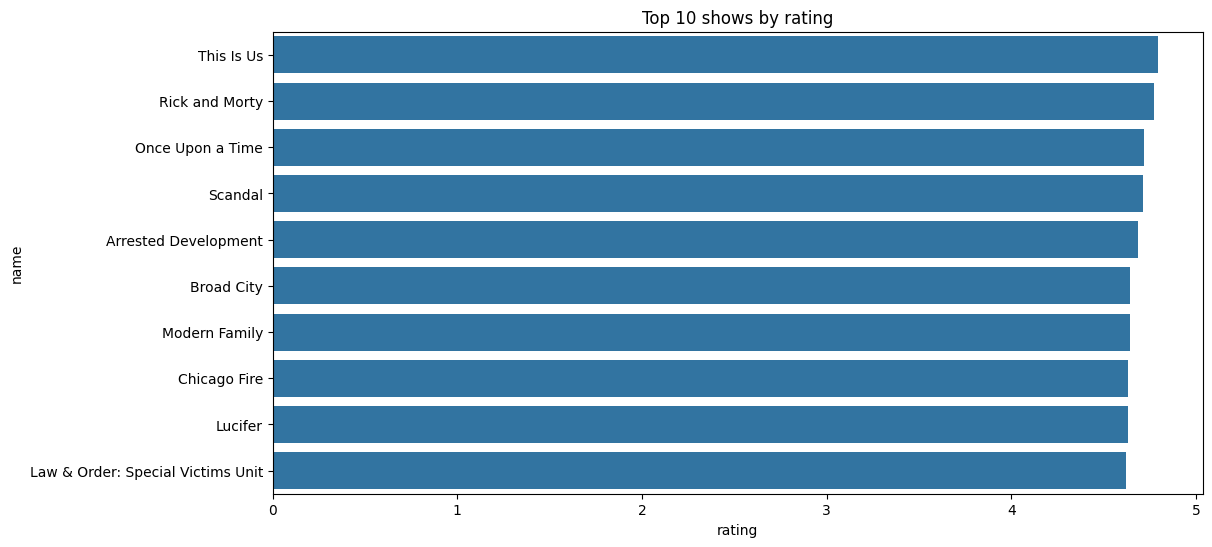

In [179]:
plt.figure(figsize=(12, 6))
sb.barplot(x='rating', y='name', data=top10)
plt.title('Top 10 shows by rating')
plt.show()

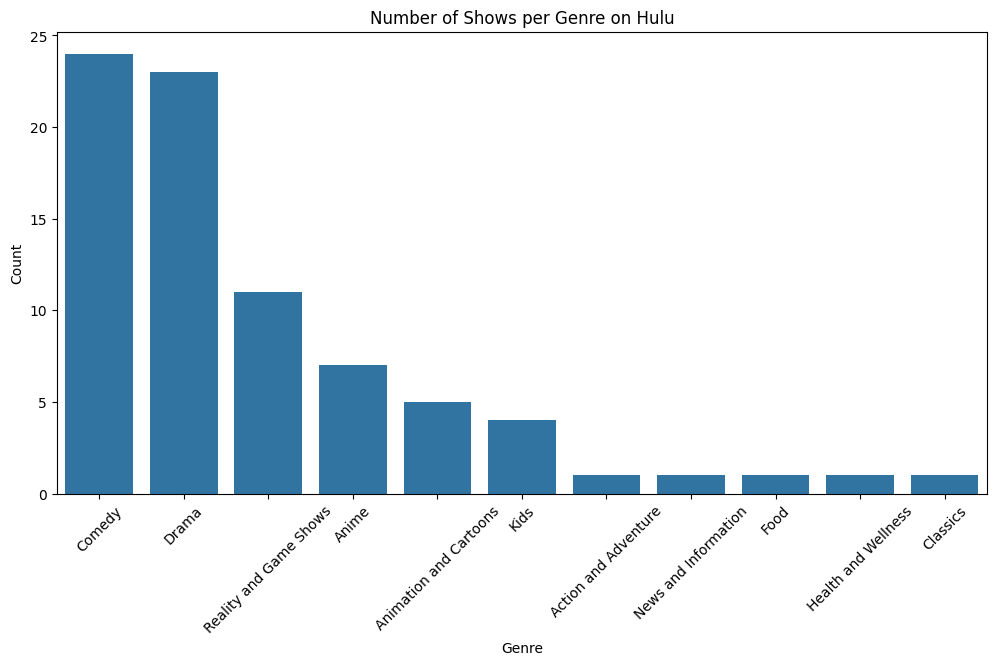

In [163]:
plt.figure(figsize=(12, 6))
sb.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Number of Shows per Genre on Hulu')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Iz prethodne tabele možemo da vidimo da su najveći broj serija komedije i drame, zatim rijaliti i anime, praćeni ostalim žanrovima u manjoj količini.

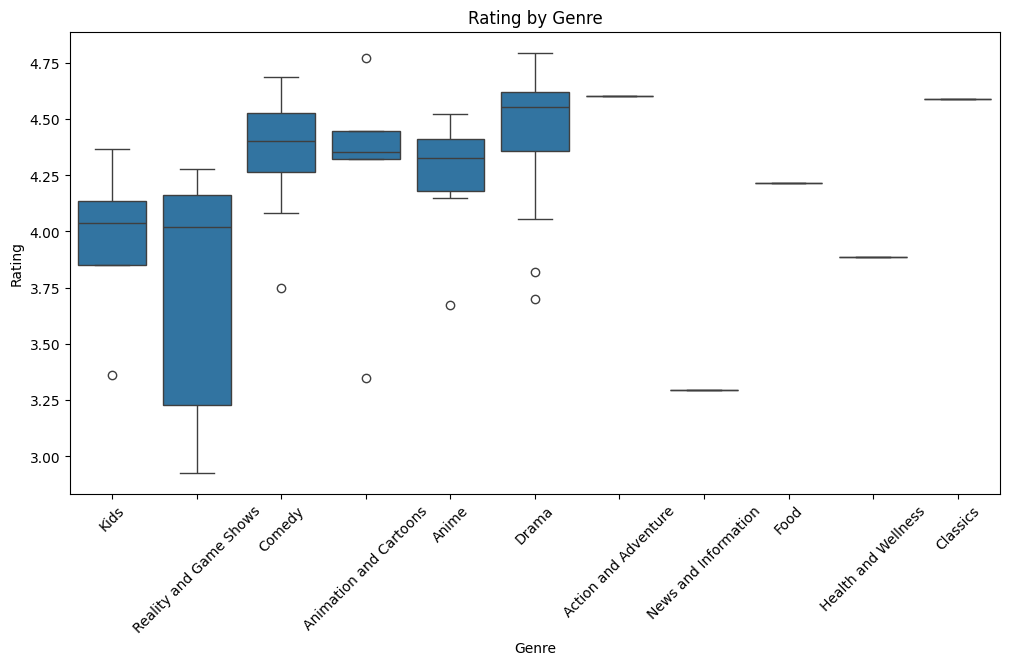

In [174]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='genre', y='rating', data=df)
plt.title('Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Ovaj box plot grafik nam govori o distribuciji ocena po žanru.
- Najveće ocene imaju drama, komedija, crtani i anime. Ocene su slične izuzev nekoliko outlajera.
- Opseg ocena za rijalitije je dosta veći nego za ostale žanrove, što znači da imaju više izmešanih ocena. 

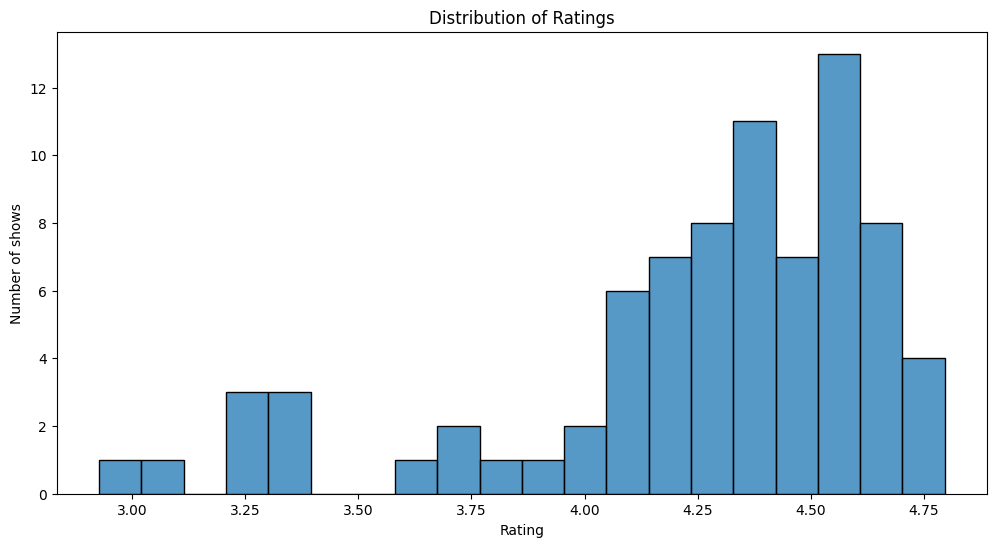

In [198]:
plt.figure(figsize=(12, 6))
sb.histplot(df['rating'], bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of shows')
plt.show()

Sa grafika iznad vidimo da najveći broj serija ima ocene između 4.1 i 4.6

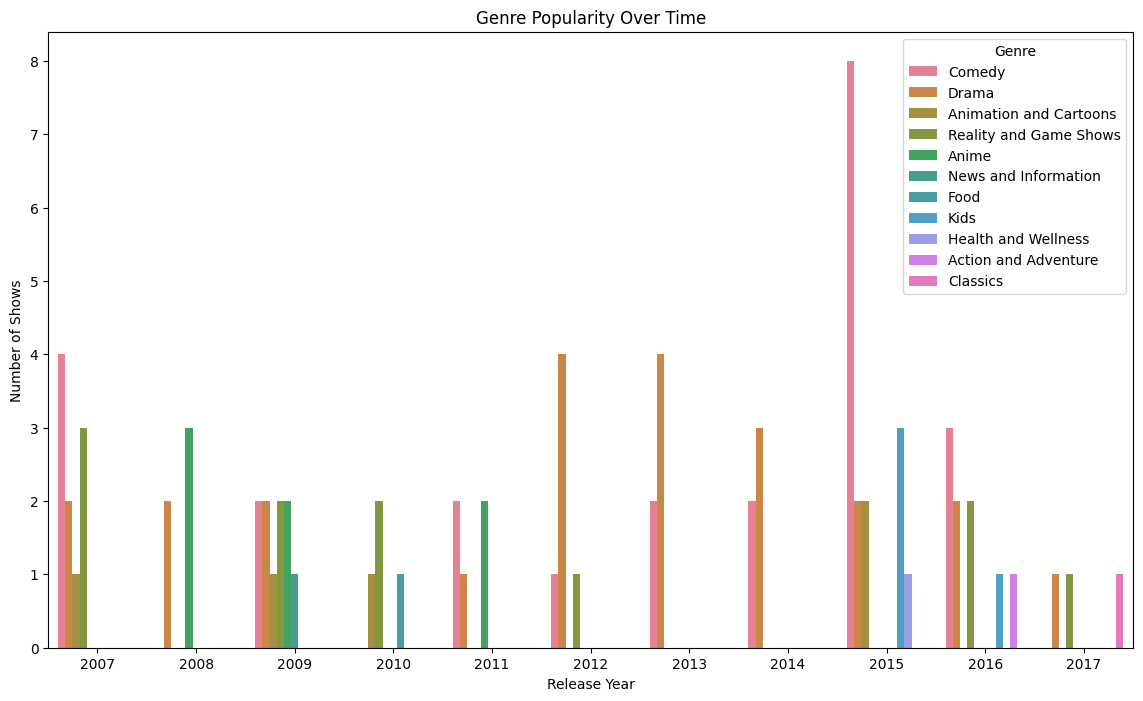

In [190]:
df['release_year'] = pd.to_datetime(df['released_at']).dt.year

plt.figure(figsize=(14, 8))
sb.countplot(x='release_year', hue='genre', data=df)
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

In [201]:
longest_running_shows = df.sort_values(by='episodes_count', ascending=False).head(10)
longest_running_shows[['name', 'episodes_count']]

,name,episodes_count
26,One Piece,747
25,Bleach,732
4,Naruto Shippuden,597
332,Naruto,440
3,Law & Order: Special Victims Unit,406
8,Saturday Night Live,370
57,Fairy Tail,349
199,Inuyasha,334
0,Family Guy,288
100,South Park,274


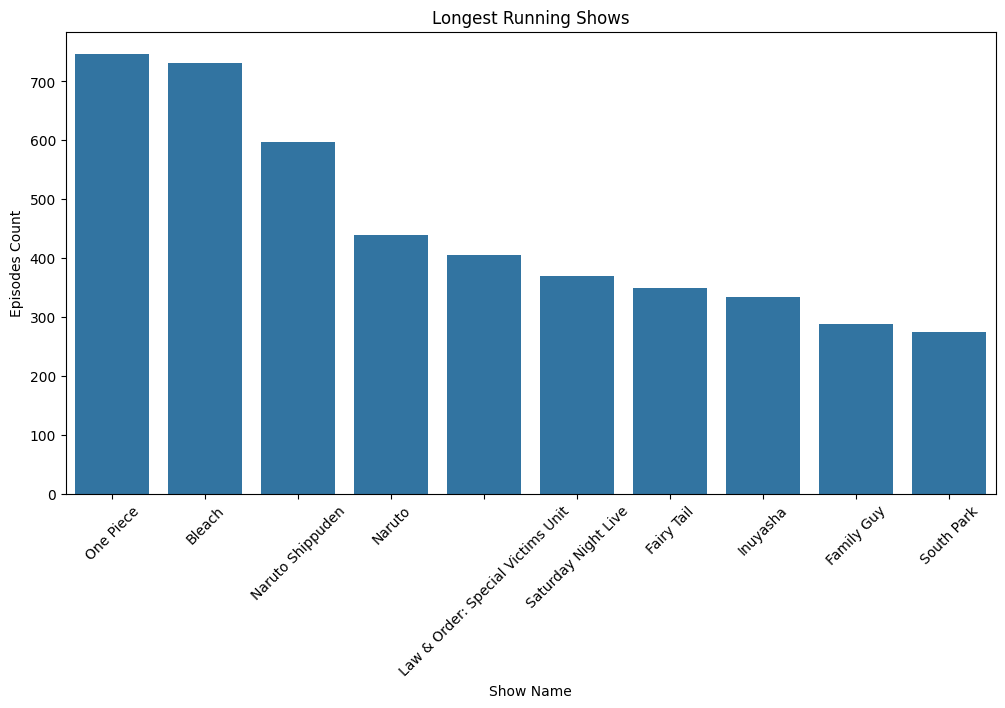

In [214]:
plt.figure(figsize=(12, 6))
sb.barplot(x='name', y='episodes_count', data=longest_running_shows)
plt.title('Longest Running Shows')
plt.xlabel('Show Name')
plt.ylabel('Episodes Count')
plt.xticks(rotation=45)
plt.show()

Možemo da vidimo da među serijama koje se najduže emituju, anime zauzima prvih nekoliko mesta.

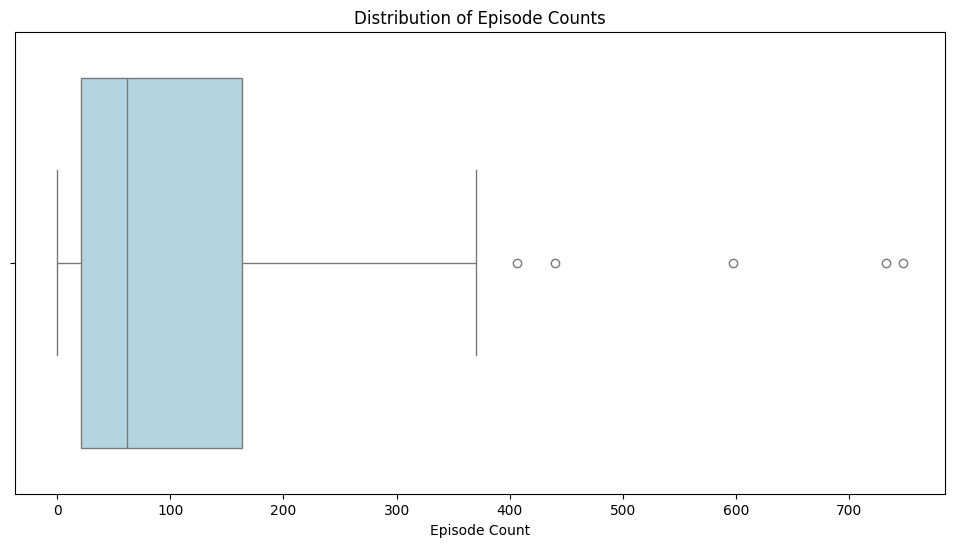

In [220]:
plt.figure(figsize=(12, 6))
sb.boxplot(x=df['episodes_count'], color='lightblue')
plt.title('Distribution of Episode Counts')
plt.xlabel('Episode Count')
plt.show()

Iz box plota vidimo da broj epizoda serija uglavnom ne prelazi 200, osim kod nekoliko koje imaju jako veliki broj kao što smo videli na prethodnom grafiku.

In [204]:
average_episode_by_genre = df.groupby('genre')['episodes_count'].mean().sort_values(ascending=False)
print("Average Episode Count by Genre:")
average_episode_by_genre

Average Episode Count by Genre:


genre
Anime                     490.714286
Classics                  180.000000
Kids                      164.000000
Animation and Cartoons    120.000000
Health and Wellness        88.000000
Comedy                     85.833333
Drama                      81.217391
Reality and Game Shows     52.272727
News and Information       16.000000
Food                       10.000000
Action and Adventure        5.000000
Name: episodes_count, dtype: float64

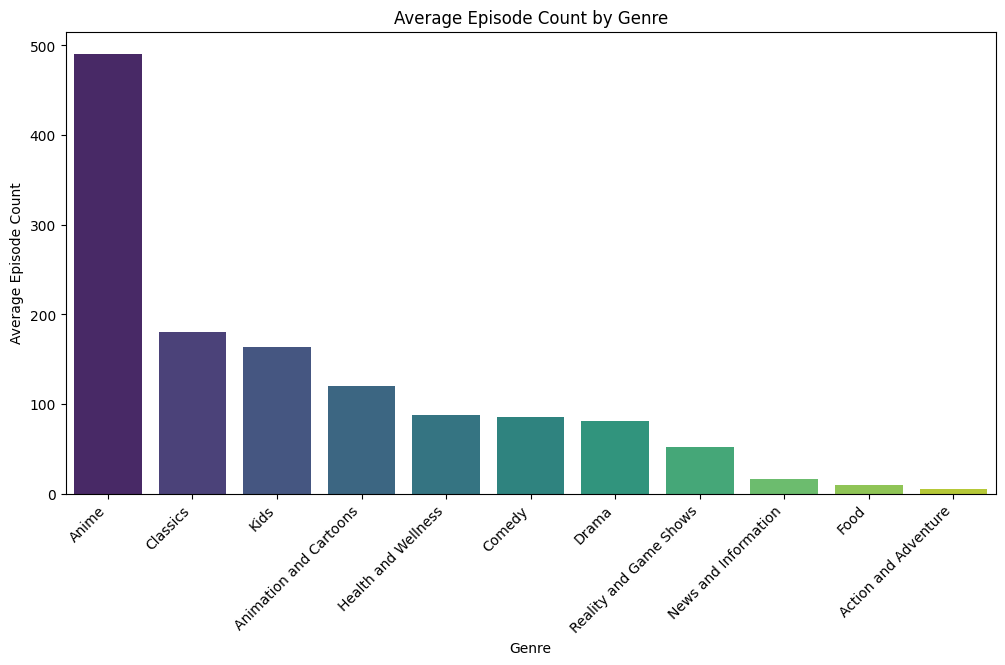

In [233]:
plt.figure(figsize=(12, 6))
sb.barplot(x='genre', y='episodes_count', data=average_episode_by_genre.reset_index(), ci=None, palette='viridis')
plt.title('Average Episode Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Episode Count')
plt.xticks(rotation=45, ha='right')
plt.show()

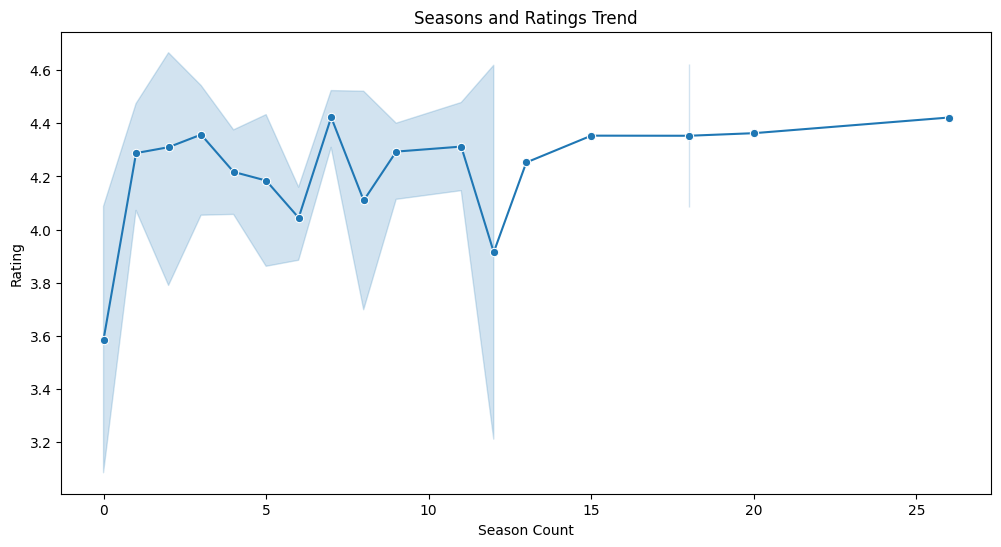

In [224]:
plt.figure(figsize=(12, 6))
sb.lineplot(x='seasons_count', y='rating', data=df, marker='o')
plt.title('Seasons and Ratings Trend')
plt.xlabel('Season Count')
plt.ylabel('Rating')
plt.show()

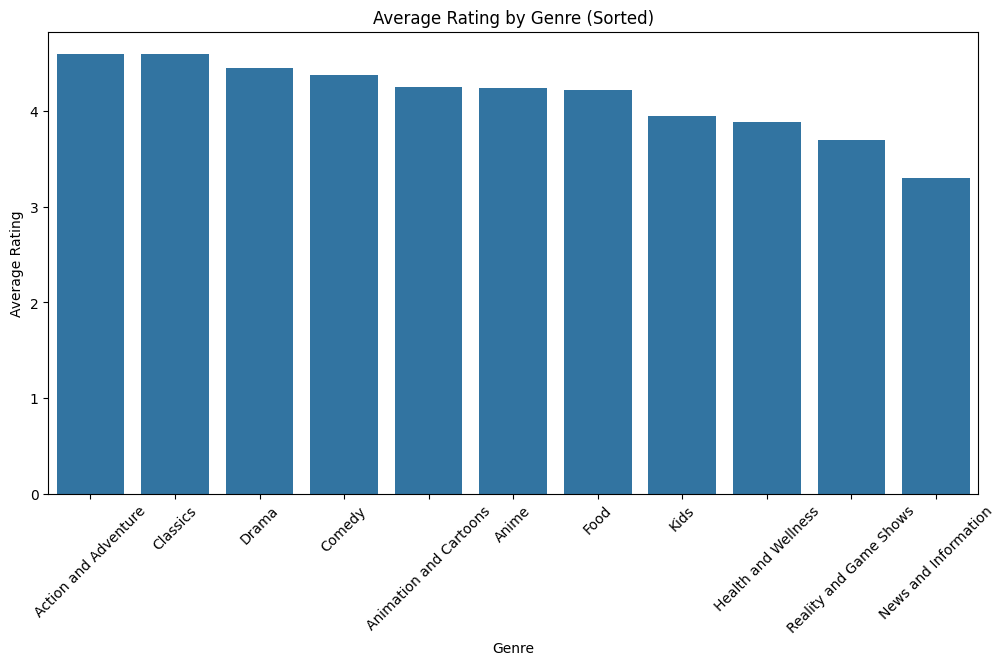

In [240]:
average_rating_by_genre = df.groupby('genre')['rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sb.barplot(x='genre', y='rating', data=average_rating_by_genre)
plt.title('Average Rating by Genre (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()